In [1]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


# Parte A


In [2]:
def betA(initialFunds, nRuns,nBets):
    fundList=[]
    #Runs a single player nRuns times to sample the probability distribution.
    for run in range(nRuns):
        funds=initialFunds
        #Runs a single game of nBets bets.
        for i in range(nBets):
            #random integer to sample the posibilities of the player.
            r = randint(1,37)
            #If the roulette is green he wins 36 units of of money.
            if r == 1:
                funds+=36
            #If the roulette is either red or black he lost one unit of money.
            else:
                funds-=1
            #If the player has no more money the game ends.
            if funds<=0:
                break
        fundList.append(funds)
    return(fundList)

In [3]:
def gameA(nPlayers,initialFunds,nBets):
    nPlayers_broke = 0
    time=0
    fundList = [initialFunds]*nPlayers
    while nPlayers_broke<(nPlayers/2.0):
        time+=1
        for i in range(nPlayers):
            #print(fundList)
            #print('\n')
            #Plays the game for player i.
            if nPlayers_broke>=(nPlayers/2.0):
                break
            elif fundList[i]==0:
                #print('el jugador ' + str(i)+' no tiene plata\n')
                pass
            else:
                for j in range(nBets):
                    r = randint(1,37)                
                    #print('el jugador ' + str(i) + ' apuesta\n')
                    if r == 18:
                        fundList[i]+=36
                        #print('fondos del jugador ' + str(i) + ': ' + str(fundList[i])+'\n')
                    else:
                        fundList[i]-=1
                        #print('fondos del jugador ' + str(i) + ': ' + str(fundList[i])+'\n')
                        if fundList[i]<=0:
                            #print('SE QUEBRÓ ' + str(i) + '\n')
                            nPlayers_broke+=1
                            #nPlayers-=1
                            #fundList += [fundList.pop(i)]
                            #print(fundList)
                            #print('\n')
                            break
   
    return(time)

In [4]:
initialFunds=100
nRuns=10**4
nBets=10**2

fListA = betA(initialFunds, nRuns,nBets)

In [5]:
nPlayers=200
tListA=[]
for run in range(40):    
    tListA.append(gameA(nPlayers,100,100))  

La Media es: 103.156


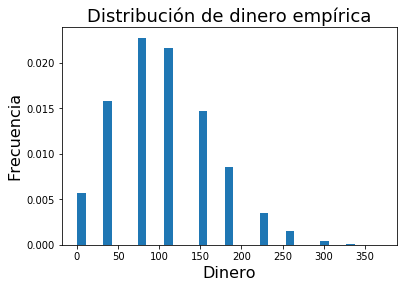

In [6]:
print('La Media es: ' + str(mean(fListA)))
xlabel('Dinero',fontsize=16)
ylabel('Frecuencia',fontsize=16)
title('Distribución de dinero empírica',fontsize=18)
hist(fListA,normed=True,bins=35)
show()

In [7]:
print('El tiempo promedio para que 100 jugadores de 200 se quiebren es de ' + str(mean(tListA))+ ' rondas de 100 juegos.')

El tiempo promedio para que 100 jugadores de 200 se quiebren es de 8.675 rondas de 100 juegos.


# Parte B

In [8]:
def betB(initialFunds, nRuns, nBets):
    fundList2 = []
    for run in range(nRuns):
        funds=initialFunds
        for i in range(nBets):
            r = randint(1,37)
            if r<19:
                funds+=1
            else:
                funds-=1
            if funds<=0:
                break
        fundList2.append(funds)
    return(fundList2)

In [9]:
def gameB(nPlayers,initialFunds,nBets):
    nPlayers_broke = 0
    time=0
    fundList = [initialFunds]*nPlayers
    while nPlayers_broke<(nPlayers/2.0):
        time+=1
        for i in range(nPlayers):
            #print(fundList)
            #print('\n')
            #Plays the game for player i.
            if nPlayers_broke>=(nPlayers/2.0):
                break
            elif fundList[i]==0:
                #print('el jugador ' + str(i)+' no tiene plata\n')
                pass
            else:
                for j in range(nBets):
                    r = randint(1,37)                
                    #print('el jugador ' + str(i) + ' apuesta\n')
                    if r < 18:
                        fundList[i]+=1
                        #print('fondos del jugador ' + str(i) + ': ' + str(fundList[i])+'\n')
                    else:
                        fundList[i]-=1
                        #print('fondos del jugador ' + str(i) + ': ' + str(fundList[i])+'\n')
                        if fundList[i]<=0:
                            #print('SE QUEBRÓ ' + str(i) + '\n')
                            nPlayers_broke+=1
                            #nPlayers-=1
                            #fundList += [fundList.pop(i)]
                            #print(fundList)
                            #print('\n')
                            break
            #If the number of players broke is half of the total players nor more players bet.   
    return(time)

In [10]:
initialFunds=100
nRuns=10**4
nBets=100

fListB = betB(initialFunds,nRuns,nBets)

La media es: 100.0924


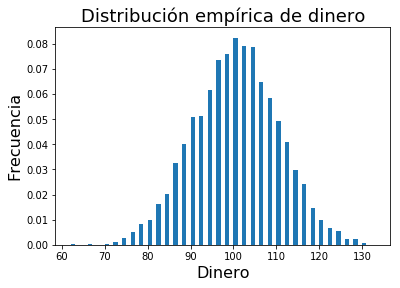

In [11]:
print('La media es: ' + str(mean(fListB)))

xlabel('Dinero',fontsize=16)
ylabel('Frecuencia',fontsize=16)
title('Distribución empírica de dinero',fontsize=18)
hist(fListB,normed=True,bins=arange(min(fListB),max(fListB)))
show()

In [12]:
nPlayers=200
initialFunds=100
nBets=100

timeListB = []

for i in range(20):
    timeListB.append(gameB(nPlayers,initialFunds,nBets))

In [13]:
print('El tiempo promedio para que 100 jugadores de 200 se quiebren es de  ' + str(mean(timeListB))+ ' rondas de 100 juegos.')

El tiempo promedio para que 100 jugadores de 200 se quiebren es de  17.35 rondas de 100 juegos.


# Parte C

In [14]:
def betC(initialFunds,nRuns,nBets):
    fundList3 = []
    for run in range(nRuns):
        funds=initialFunds
        losses=0
        for i in range(nBets):
            bet = 1*2**losses
            r = randint(1,37)
            if bet>funds:
                if r<19:
                    funds+=funds
                    losses=0
                else:
                    funds = 0
                    break
            else: 
                if r<19:
                    funds+=bet
                    losses=0
                else:
                    funds-=bet
                    losses +=1
        fundList3.append(funds)
    return(fundList3)

In [15]:
def gameC(nPlayers,initialFunds,nBets):
    nPlayers_broke = 0
    time=0
    fundList = [initialFunds]*nPlayers
    while nPlayers_broke<(nPlayers/2.0):
        time+=1
        for i in range(nPlayers):
            #print(fundList)
            #print('\n')
            if nPlayers_broke>=(nPlayers/2.0):
                break
            elif fundList[i]==0:
                #print('el jugador ' + str(i)+' no tiene plata\n')
                pass
            else:
                losses=0
            #Plays the game for player i.            
                for j in range(nBets):
                    bet = 1*2**losses
                    r = randint(1,37)                
                    #print('el jugador ' + str(i) + ' apuesta\n')
                    if bet>fundList[i]:
                        if r<19:
                            fundList[i]+=fundList[i]
                            losses=0
                        else:
                            fundList[i] = 0
                            #print('SE QUEBRÓ ' + str(i) + '\n')
                            nPlayers_broke+=1
                            break
                    else: 
                        if r<19:
                            fundList[i]+=bet
                            losses=0
                        else:
                            fundList[i]-=bet
                            losses +=1
                            if fundList[i]==0:
                               # print('SE QUEBRÓ ' + str(i) + '\n')
                                nPlayers_broke+=1
                                break
                   
    return(time)

In [16]:
initialFunds=100
nRuns=10**4
nBets=10**2
fListC=betC(initialFunds,nRuns,nBets)

La media es: 99.886


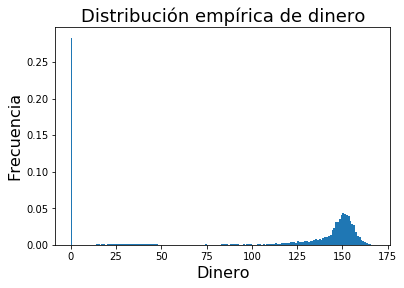

In [17]:
print('La media es: ' + str(mean(fListC)))

xlabel('Dinero',fontsize=16)
ylabel('Frecuencia',fontsize=16)
title('Distribución empírica de dinero',fontsize=18)
hist(fListC,normed=True,bins=arange(amin(fListC),amax(fListC)))
show()

In [18]:
nPlayers=200
initialFunds=100
nBets=100

timeListC = []

for i in range(20):
    timeListC.append(gameC(nPlayers,initialFunds,nBets))

In [19]:
print('El tiempo promedio para que 100 jugadores de 200 se quiebren es de  ' + str(mean(timeListC))+ ' rondas de 100 juegos.')

El tiempo promedio para que 100 jugadores de 200 se quiebren es de  3.0 rondas de 100 juegos.
